# PHASE 1: UNDERSTANDING THE BUSINESS


**CONTEXT**
In an effort to improve public health and optimize decision-making in health policy, the Ministry of Health of Chile (MINSAL) has entrusted our team, specialized in data analysis and predictive modeling, with a critical task: to conduct a detailed analysis of mortality trends and patterns in the country. This project is part of the national health strategy, aimed at reducing health inequalities, increasing life expectancy, and improving the quality of life of the entire Chilean population.

The main objective of the project is to develop robust predictive models that will enable us to anticipate and respond more effectively to emerging public health needs. With these models, MINSAL will be able to more accurately identify high-risk groups, the leading causes of mortality, and the determinants of health, which will facilitate resource allocation and the implementation of preventive and corrective strategies to improve healthcare and reduce mortality rates.

To achieve this, our team will rely on an extensive dataset that includes records of deaths, disease diagnoses, access to healthcare services, and other critical indicators. These data allow us to analyze relationships between demographic, socioeconomic, and geographic factors to provide a holistic view of health challenges in the country.



As a team, we will focus on creating a predictive model that can determine the likely cause of death based on demographic characteristics and other associated factors. This will provide MINSAL with a tool for planning and prioritizing health policies, especially in vulnerable areas with limited access to healthcare services.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
df = pd.read_csv("C:/users/Nico/Desktop/Defunciones/DefuncionesKedro/defuncioneskedro/data/01_raw/DEFUNCIONES.csv", sep=";", encoding='ISO-8859-1')

In [5]:
dfo = df.copy()

# PHASE 2: UNDERSTANDING THE DATA

We obtain the total number of records available in our dataset, which lets us know how much data we have to work with for the analysis.

In [6]:
df.shape

(341567, 27)

We display a small portion of the dataset using the head() function, which allows us to view the first few records. We can specify the number of rows we want to see to get a general idea of the dataset's content.

In [5]:
df.head(30)

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,2024,24-06-2024,Mujer,1,73,13604.0,Padre Hurtado,Metropolitana de Santiago,G309,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
1,2024,27-07-2024,Hombre,1,71,14101.0,Valdivia,De Los Ríos,I509,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
2,2024,28-03-2024,Hombre,1,61,6116.0,Requínoa,Del Libertador B. O'Higgins,I259,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
3,2024,02-07-2024,Mujer,1,19,13117.0,Lo Prado,Metropolitana de Santiago,Q433,Q00-Q99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
4,2024,20-07-2024,Hombre,1,77,8110.0,Talcahuano,Del Bíobío,J189,J00-J99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
5,2024,14-06-2024,Mujer,1,55,7101.0,Talca,Del Maule,C509,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
6,2024,05-08-2024,Hombre,1,73,4102.0,Coquimbo,De Coquimbo,I219,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
7,2024,16-01-2024,Mujer,2,11,13501.0,Melipilla,Metropolitana de Santiago,G403,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
8,2024,15-08-2024,Mujer,1,105,10101.0,Puerto Montt,De Los Lagos,R99X,R00-R99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
9,2024,15-05-2024,Hombre,1,102,4103.0,Andacollo,De Coquimbo,G309,G00-G99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


The columns containing the data we will work with later are displayed.

In [8]:
df.columns

Index(['ANO_DEF', 'FECHA_DEF', 'GLOSA_SEXO', 'EDAD_TIPO', 'EDAD_CANT',
       'CODIGO_COMUNA_RESIDENCIA', 'GLOSA_COMUNA_RESIDENCIA', 'GLOSA_REG_RES',
       'DIAG1', 'CAPITULO_DIAG1', 'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1',
       'GLOSA_GRUPO_DIAG1', 'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
       'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2',
       'LUGAR_DEFUNCION'],
      dtype='object')

We display the last 5 rows of our dataset to check how the records end and ensure there are no unexpected or missing data at the end of the dataset.

In [9]:
df.tail()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
341562,2022,03-05-2022,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,C509,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341563,2022,13-02-2022,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
341564,2022,02-04-2022,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C20X,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341565,2022,08-02-2022,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C56X,C00-D48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
341566,2022,06-07-2022,Mujer,1,52,6201.0,Pichilemu,Del Libertador B. O'Higgins,G122,G00-G99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


We use info() to view the properties of the columns, revealing that most of them are of the object type.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341567 entries, 0 to 341566
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ANO_DEF                    341567 non-null  int64  
 1   FECHA_DEF                  341567 non-null  object 
 2   GLOSA_SEXO                 341567 non-null  object 
 3   EDAD_TIPO                  341567 non-null  int64  
 4   EDAD_CANT                  341567 non-null  int64  
 5   CODIGO_COMUNA_RESIDENCIA   341563 non-null  float64
 6   GLOSA_COMUNA_RESIDENCIA    341563 non-null  object 
 7   GLOSA_REG_RES              341563 non-null  object 
 8   DIAG1                      341567 non-null  object 
 9   CAPITULO_DIAG1             341567 non-null  object 
 10  GLOSA_CAPITULO_DIAG1       341567 non-null  object 
 11  CODIGO_GRUPO_DIAG1         341567 non-null  object 
 12  GLOSA_GRUPO_DIAG1          341567 non-null  object 
 13  CODIGO_CATEGORIA_DIAG1     34

We use df.isna().sum() to identify how many null (or missing) values there are in each column of our dataset. This helps us detect columns with incomplete or empty data and decide how to handle them in the analysis.

In [11]:
df.isna().sum()

ANO_DEF                           0
FECHA_DEF                         0
GLOSA_SEXO                        0
EDAD_TIPO                         0
EDAD_CANT                         0
CODIGO_COMUNA_RESIDENCIA          4
GLOSA_COMUNA_RESIDENCIA           4
GLOSA_REG_RES                     4
DIAG1                             0
CAPITULO_DIAG1                    0
GLOSA_CAPITULO_DIAG1              0
CODIGO_GRUPO_DIAG1                0
GLOSA_GRUPO_DIAG1                 0
CODIGO_CATEGORIA_DIAG1            0
GLOSA_CATEGORIA_DIAG1             0
CODIGO_SUBCATEGORIA_DIAG1         0
GLOSA_SUBCATEGORIA_DIAG1          0
DIAG2                        191975
CAPITULO_DIAG2               319580
GLOSA_CAPITULO_DIAG2         319580
CODIGO_GRUPO_DIAG2           319580
GLOSA_GRUPO_DIAG2            319580
CODIGO_CATEGORIA_DIAG2       319580
GLOSA_CATEGORIA_DIAG2        319580
CODIGO_SUBCATEGORIA_DIAG2    319580
GLOSA_SUBCATEGORIA_DIAG2     319580
LUGAR_DEFUNCION                   0
dtype: int64

With df.describe(), we obtain a statistical summary of the numerical columns in our dataset. This summary includes information like the count of values, mean, minimum, maximum, and other important data that help us better understand the distribution and characteristics of the data.

In [12]:
df.describe()

,ANO_DEF,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA
count,341567.000000,341567.000000,341567.000000,341563.000000
mean,2022.841492,1.017888,73.266358,9730.885740
std,0.785898,0.208304,18.141500,4039.765798
min,2022.000000,0.000000,0.000000,1101.000000
25%,2022.000000,1.000000,65.000000,6114.000000
50%,2023.000000,1.000000,77.000000,10101.000000
75%,2023.000000,1.000000,86.000000,13121.000000
max,2024.000000,9.000000,121.000000,99999.000000


-Death Year (ANO_DEF): For analyzing temporal trends in deaths.
-Gender (GLOSA_SEXO): To identify gender differences in mortality.
-Age (EDAD_CANT): A key factor in many causes of death.
-Municipality and Region of Residence (CODIGO_COMUNA_RESIDENCIA, -GLOSA_COMUNA_RESIDENCIA, GLOSA_REG_RES): To capture the impact of -geographic and socioeconomic factors.
-Place of Death (LUGAR_DEFUNCION): To add context about where the death occurred.

In [13]:
target = df['GLOSA_GRUPO_DIAG1']

features = df[['GLOSA_SEXO',
                'EDAD_CANT', 'GLOSA_REG_RES', 
                'LUGAR_DEFUNCION', 'GLOSA_CAPITULO_DIAG1']]

We create a chart to visualize how deaths are distributed by gender. This helps us identify potential differences in the number of deaths between men and women, facilitating the analysis of mortality patterns by gender.

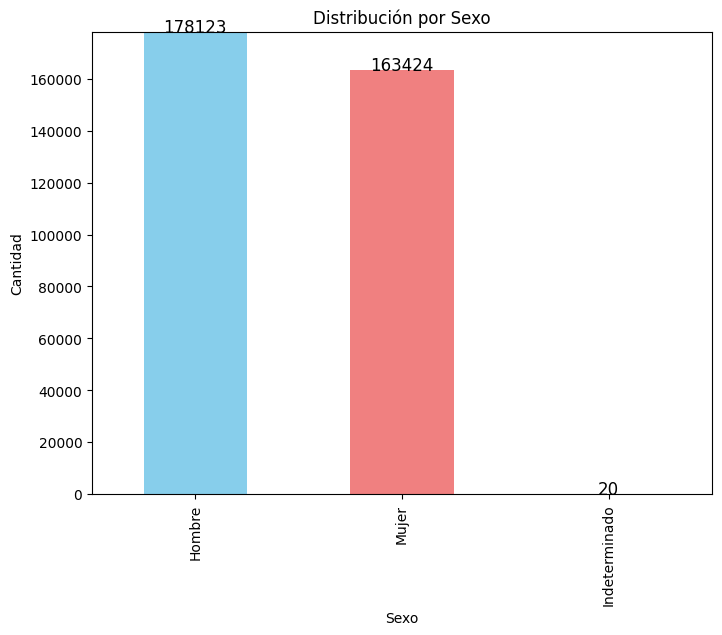

In [14]:
conteo_sexo = df['GLOSA_SEXO'].value_counts()

plt.figure(figsize=(8, 6))
barras = conteo_sexo.plot(kind='bar', color=['skyblue', 'lightcoral'])

for i, count in enumerate(conteo_sexo):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)


plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.ylim(0, conteo_sexo.max() + 10)  
plt.show()

The next chart shows the top 5 causes of death with the highest number of recorded deaths in Chile between 2022 and 2024. This visualization allows us to identify the main causes of mortality during this period and analyze potential trends or public health concerns.

C:\Users\victo\AppData\Local\Temp\ipykernel_40240\1285352821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')


Text(0.5, 1.0, 'Top 5 Enfermedades que más Muertes han Causado')

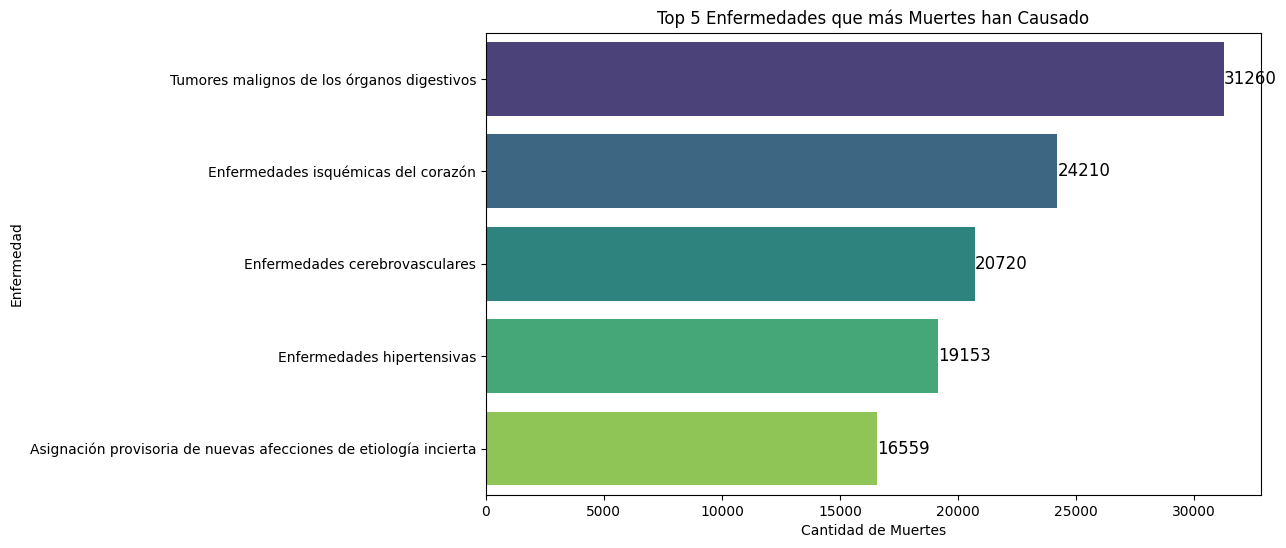

In [15]:

top_enfermedades = df['GLOSA_GRUPO_DIAG1'].value_counts().head(5) 


plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades.values, y=top_enfermedades.index, palette='viridis')


for i in range(len(top_enfermedades)):
    plt.text(top_enfermedades.values[i] + 0.2, i, str(top_enfermedades.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado')

We decided to split the previous chart into two:

First Chart: Shows the top causes of death in the Metropolitan Region, as its large population may influence our analysis.
Second Chart: Shows the top causes of death in the rest of Chile's regions.

As seen in the charts, the top 3 leading causes of death are consistent nationwide. However, in the Metropolitan Region, influenza appears as one of the leading causes of death, while this is not observed on a large scale in other regions. Instead, in other regions, there is a higher number of deaths under the category of "provisional assignment of new ailments of uncertain etiology," which does not occur in the Metropolitan Region.

C:\Users\victo\AppData\Local\Temp\ipykernel_40240\4197529505.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades_metropolitana.values, y=top_enfermedades_metropolitana.index, palette='viridis')


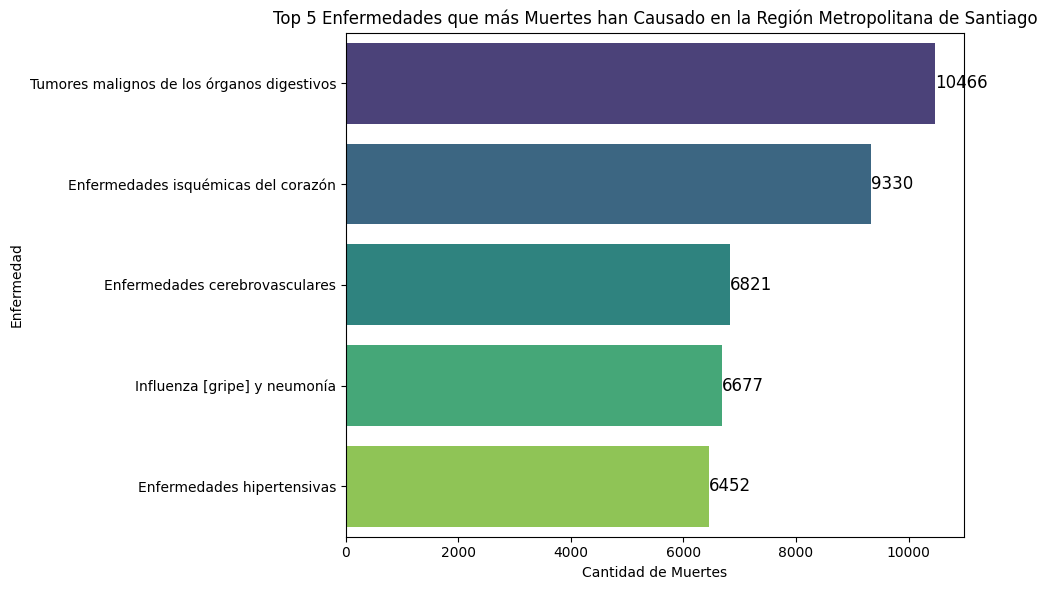

C:\Users\victo\AppData\Local\Temp\ipykernel_40240\4197529505.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=top_enfermedades_otras_regiones.values, y=top_enfermedades_otras_regiones.index, palette='magma')


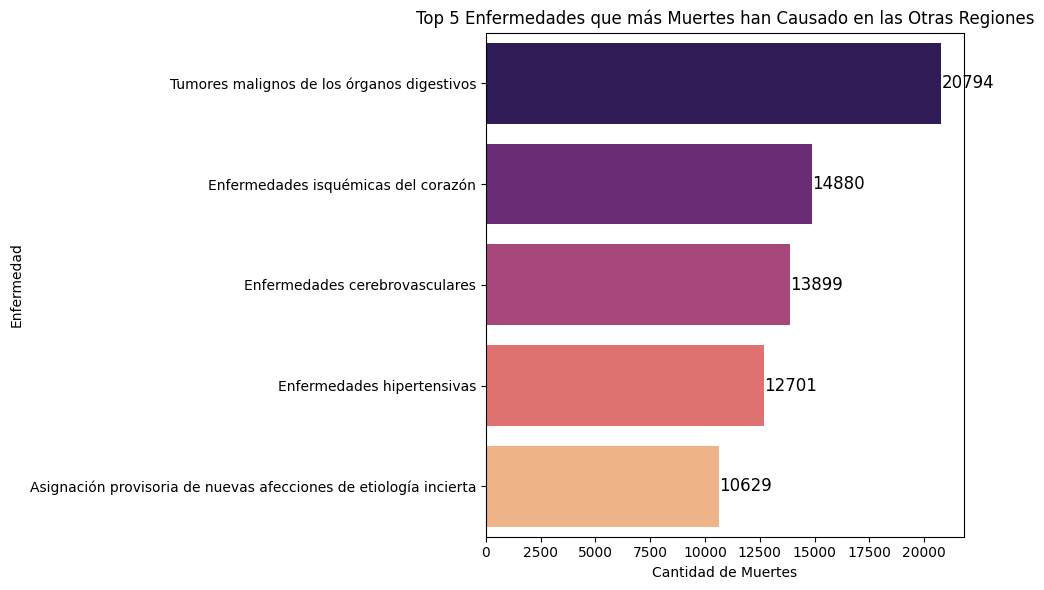

In [16]:
df_metropolitana = df[df['GLOSA_REG_RES'] == 'Metropolitana de Santiago']

top_enfermedades_metropolitana = df_metropolitana['GLOSA_GRUPO_DIAG1'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades_metropolitana.values, y=top_enfermedades_metropolitana.index, palette='viridis')

for i in range(len(top_enfermedades_metropolitana)):
    plt.text(top_enfermedades_metropolitana.values[i] + 0.2, i, str(top_enfermedades_metropolitana.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado en la Región Metropolitana de Santiago')
plt.tight_layout()

plt.show()





df_otras_regiones = df[df['GLOSA_REG_RES'] != 'Metropolitana de Santiago']

top_enfermedades_otras_regiones = df_otras_regiones['GLOSA_GRUPO_DIAG1'].value_counts().head(5)

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=top_enfermedades_otras_regiones.values, y=top_enfermedades_otras_regiones.index, palette='magma')

for i in range(len(top_enfermedades_otras_regiones)):
    plt.text(top_enfermedades_otras_regiones.values[i] + 0.2, i, str(top_enfermedades_otras_regiones.values[i]), va='center', color='black', fontsize=12)

plt.xlabel('Cantidad de Muertes')
plt.ylabel('Enfermedad')
plt.title('Top 5 Enfermedades que más Muertes han Causado en las Otras Regiones')
plt.tight_layout()

plt.show()

We conduct an analysis of the number of deaths by each region and order them from highest to lowest by the number of deaths. This allows us to identify regions with the highest mortality rates and compare how the number of deaths varies across different areas of the country.

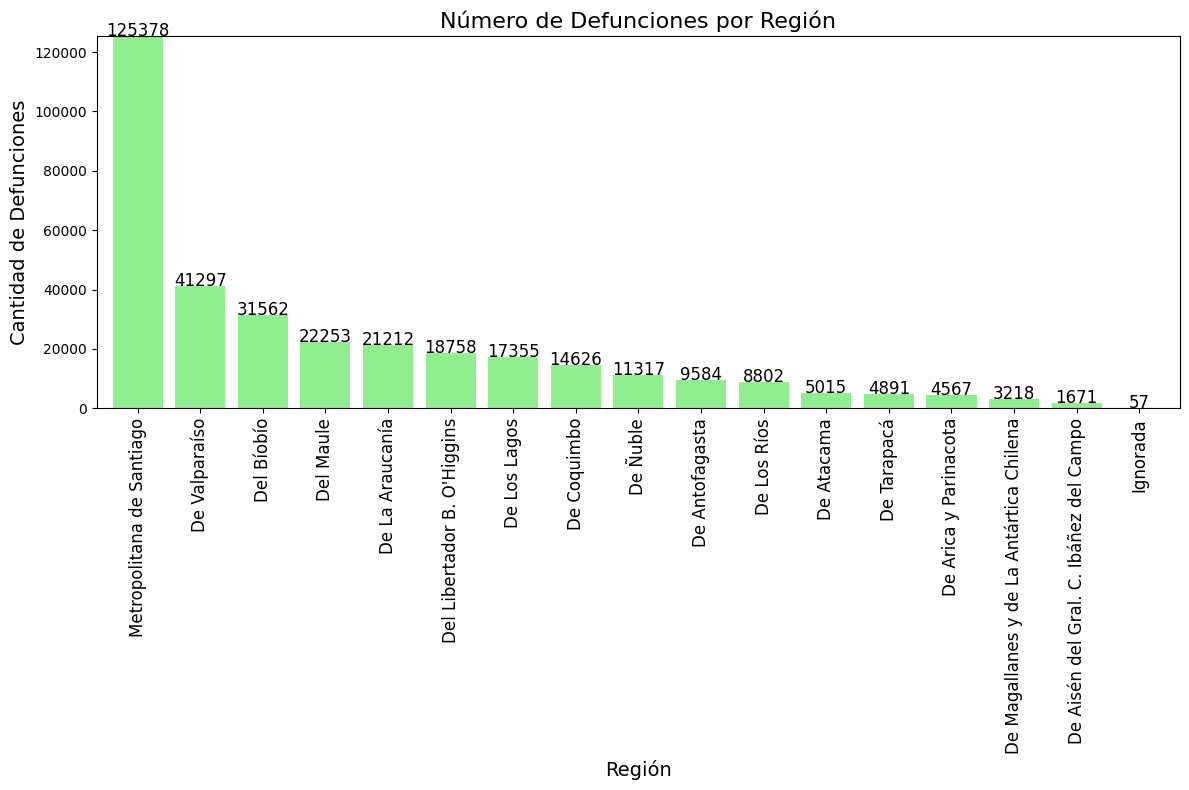

In [17]:

conteo_defunciones_region = df['GLOSA_REG_RES'].value_counts()


plt.figure(figsize=(12, 8))
barras = conteo_defunciones_region.plot(kind='bar', color='lightgreen', width=0.8)


for i, count in enumerate(conteo_defunciones_region):
    barras.text(i, count + 0.5, str(count), ha='center', fontsize=12)


plt.title('Número de Defunciones por Región', fontsize=16)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Cantidad de Defunciones', fontsize=14)
plt.ylim(0, conteo_defunciones_region.max() + 100)
plt.xticks(rotation=90, fontsize=12)
plt.tight_layout()


plt.show()


The generated chart shows the age distribution at the time of death between 2022 and 2024. There is a significant peak around 80 years of age, indicating this is the most common age at death during this period. Approximately 38,000 deaths are recorded around this age, suggesting that most deaths occur in older adults.

This data is crucial for understanding the country's demographic trends and could influence public policy planning aimed at elderly care.

Additionally, we created a new column to consolidate ages into a single format, in years, as previously age was represented in four types: years, months, days, and others. Now, age is only shown in years.



C:\Users\victo\AppData\Local\Temp\ipykernel_40240\3584441774.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.91666667 0.08333333 0.16666667 0.08333333 0.75       0.66666667
 0.16666667 0.5        0.16666667 0.08333333 0.41666667 0.08333333
 0.16666667 0.5        0.66666667 0.5        0.66666667 0.16666667
 0.08333333 0.33333333 0.16666667 0.33333333 0.41666667 0.41666667
 0.33333333 0.25       0.08333333 0.16666667 0.08333333 0.75
 0.08333333 0.25       0.16666667 0.75       0.08333333 0.08333333
 0.33333333 0.16666667 0.83333333 0.08333333 0.08333333 0.66666667
 0.08333333 0.08333333 0.91666667 0.66666667 0.41666667 0.08333333
 0.58333333 0.58333333 0.16666667 0.16666667 0.58333333 0.16666667
 0.08333333 0.08333333 0.58333333 0.33333333 0.16666667 0.16666667
 0.25       0.41666667 0.41666667 0.08333333 0.16666667 0.41666667
 0.16666667 0.16666667 0.91666667 0.16666667 0.16666667 0.33333333
 0.166

   EDAD_CANT  EDAD_TIPO  EDAD_AJUSTADA
0         73          1             73
1         71          1             71
2         61          1             61
3         19          1             19
4         77          1             77


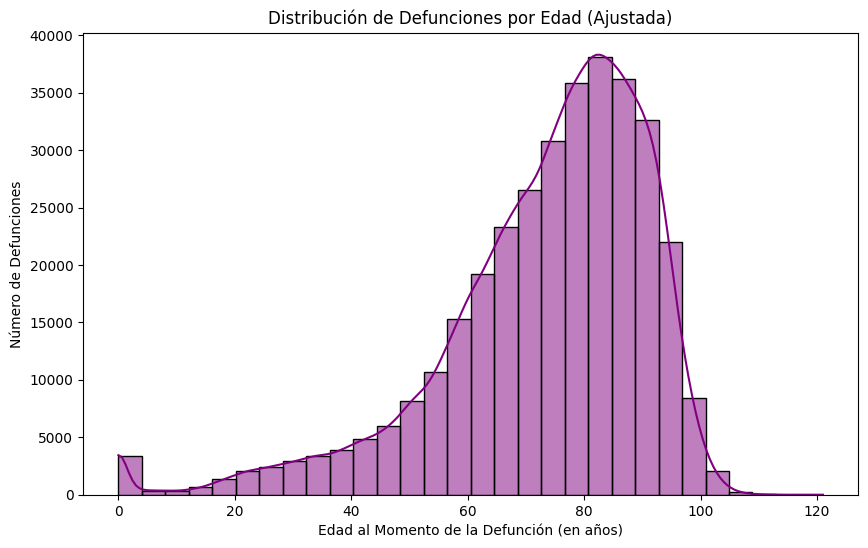

In [18]:
df['EDAD_AJUSTADA'] = df['EDAD_CANT'].copy()

df.loc[df['EDAD_TIPO'] == 2, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 12    
df.loc[df['EDAD_TIPO'] == 3, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / 365   
df.loc[df['EDAD_TIPO'] == 4, 'EDAD_AJUSTADA'] = df['EDAD_CANT'] / (365 * 24)  
df.loc[df['EDAD_TIPO'] == 0, 'EDAD_AJUSTADA'] = None  

df['EDAD_AJUSTADA'] = df['EDAD_AJUSTADA'].apply(lambda x: 0 if pd.notnull(x) and x < 1 else x).astype('Int64')


print(df[['EDAD_CANT', 'EDAD_TIPO', 'EDAD_AJUSTADA']].head())

plt.figure(figsize=(10, 6))
sb.histplot(df['EDAD_AJUSTADA'].dropna(), bins=30, kde=True, color='purple')
plt.xlabel('Edad al Momento de la Defunción (en años)')
plt.ylabel('Número de Defunciones')
plt.title('Distribución de Defunciones por Edad (Ajustada)')
plt.show()


There are deaths with undefined residences. This code allows us to break down and visualize which of these deaths lack defined residences.

In [19]:
filas_vacias = df[df['GLOSA_COMUNA_RESIDENCIA'].isna() | (df['GLOSA_COMUNA_RESIDENCIA'] == '')]

print(filas_vacias)

       ANO_DEF   FECHA_DEF GLOSA_SEXO  EDAD_TIPO  EDAD_CANT  \
7666      2024  28-02-2024     Hombre          1         83   
29729     2024  11-04-2024     Hombre          2          1   
42733     2024  26-04-2024      Mujer          1         52   
43641     2024  26-06-2024      Mujer          2          2   

       CODIGO_COMUNA_RESIDENCIA GLOSA_COMUNA_RESIDENCIA GLOSA_REG_RES DIAG1  \
7666                        NaN                     NaN           NaN  R99X   
29729                       NaN                     NaN           NaN  R99X   
42733                       NaN                     NaN           NaN  R99X   
43641                       NaN                     NaN           NaN  R99X   

      CAPITULO_DIAG1  ... CAPITULO_DIAG2 GLOSA_CAPITULO_DIAG2  \
7666         R00-R99  ...            NaN                  NaN   
29729        R00-R99  ...            NaN                  NaN   
42733        R00-R99  ...            NaN                  NaN   
43641        R00-R99  ...   

We generate a pie chart to show the percentages of deaths for the years 2022, 2023, and 2024.

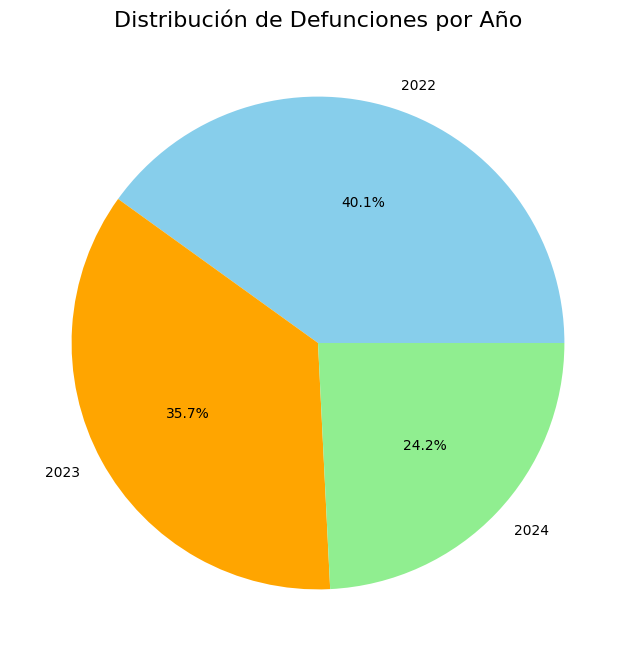

In [20]:
conteo_defunciones_ano = df['ANO_DEF'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(conteo_defunciones_ano, labels=conteo_defunciones_ano.index, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen', 'pink', 'yellow'])
plt.title('Distribución de Defunciones por Año', fontsize=16)
plt.show()


# PHASE 3: DATA PREPARATION

First, we will remove the columns with the highest number of null values. This is important because columns with many missing data points can affect the quality of the analysis and results. By eliminating them, we ensure we work with more complete and useful information.

This decision was made because these columns contain only around 20,000 entries out of the more than 340,000 existing records, representing a small portion of the dataset. With over 94% of values missing, keeping them could introduce noise and complicate the interpretation of the results.

In [21]:
columnas_a_eliminar = [
    'DIAG2',
    'CAPITULO_DIAG2',
    'GLOSA_CAPITULO_DIAG2',
    'CODIGO_GRUPO_DIAG2',
    'GLOSA_GRUPO_DIAG2',
    'CODIGO_CATEGORIA_DIAG2',
    'GLOSA_CATEGORIA_DIAG2',
    'CODIGO_SUBCATEGORIA_DIAG2',
    'GLOSA_SUBCATEGORIA_DIAG2',
    'CODIGO_SUBCATEGORIA_DIAG1',
    'GLOSA_SUBCATEGORIA_DIAG1',
    'DIAG1',
    'CAPITULO_DIAG1',
    'CODIGO_GRUPO_DIAG1',	
    'CODIGO_CATEGORIA_DIAG1',	
    'GLOSA_CATEGORIA_DIAG1'
]

df = df.drop(columns=columnas_a_eliminar, axis=1, errors='ignore')



We will convert regions to a numerical format to simplify handling in future analyses. This streamlines calculations and allows for more efficient mathematical or statistical operations.

In [22]:
region_map = {
    'Metropolitana de Santiago': 13,
    'De Valparaíso': 5,
    'Del Bíobío': 8,
    'Del Maule': 7,
    'De La Araucanía': 9,
    'De Los Lagos': 10,
    "Del Libertador B. O'Higgins": 6,  
    'De Coquimbo': 4,
    'De Ñuble': 16,
    'De Antofagasta': 2,
    'De Los Ríos': 14,
    'De Atacama': 3,
    'De Tarapacá': 1,
    'De Arica y Parinacota': 15,
    'De Magallanes y de La Antártica Chilena': 12,
    'De Aisén del Gral. C. Ibáñez del Campo': 11,
    'Ignorada': 99
}


df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].map(region_map)

We will convert the "Place of Death" column to numeric type as follows:

Home = 1
Hospital or Clinic = 2
Other = 3

In [23]:
lugar_defuncion_mapping = {
    'Casa habitación': 1,
    'Hospital o Clínica': 2,
    'Otro': 3
}

df['LUGAR_DEFUNCION'] = df['LUGAR_DEFUNCION'].map(lugar_defuncion_mapping)

In [24]:
import pandas as pd

df = df[df['LUGAR_DEFUNCION'] != 3]

We will also handle the column GLOSA_CAPITULO_DIAG1 with numbers to manage the data better, as it is essential for our project's target.

The assignments will be as follows:

Certain conditions originating in the perinatal period = 0
Certain infectious and parasitic diseases = 1
Codes for special purposes = 2
Pregnancy, childbirth, and the puerperium = 3
Diseases of the skin and subcutaneous tissue = 4
Diseases of the blood and hematopoietic organs, and certain immune system disorders = 5
Diseases of the eye and its annexes = 6
Diseases of the ear and mastoid process = 7
Diseases of the circulatory system = 8
Diseases of the digestive system = 9
Diseases of the genitourinary system = 10
Diseases of the central nervous system = 11
Diseases of the musculoskeletal system and connective tissue = 12
Respiratory system diseases = 13
Endocrine, nutritional, and metabolic diseases = 14
Congenital malformations, deformations, and chromosomal abnormalities = 15
Symptoms, signs, and abnormal clinical and laboratory findings, not elsewhere classified = 16
Mental and behavioral disorders = 17
Injuries, poisoning, and certain other consequences of external causes = 18
Tumors [Neoplasms] = 19

In [25]:
from sklearn.preprocessing import LabelEncoder

le_diag = LabelEncoder()
df['DIAG1_encoded'] = le_diag.fit_transform(df['GLOSA_CAPITULO_DIAG1'].astype(str))

We will repeat the previous process and now code the GLOSA_GRUPO_DIAG1 column, which is our target, to work more effectively with this variable in the future.

In [24]:
from sklearn.preprocessing import LabelEncoder

le_diag = LabelEncoder()
df['GRUPO_DIAG1_ENCODED'] = le_diag.fit_transform(df['GLOSA_GRUPO_DIAG1'].astype(str))

The glossary for the GLOSA_GRUPO_DIAG1 column will look as follows:

In [25]:
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None) 


clases_unicas = df['GLOSA_GRUPO_DIAG1'].unique()


clases_df = pd.DataFrame(clases_unicas, columns=['Clases'])


print(clases_df)


                                                                                                                       Clases
0                                                                       Otras enfermedades degenerativas del sistema nervioso
1                                                                                      Otras formas de enfermedad del corazón
2                                                                                         Enfermedades isquémicas del corazón
3                                                                                                Influenza [gripe] y neumonía
4                                                                                                    Tumor maligno de la mama
5                                                                                       Trastornos episódicos y paroxísticos 
6                                                                           Causas de mortalidad mal definidas y desco

We will replace values labeled "Ignored" (99) and null values in our variable GLOSA_REG_RES, assigning them the mean or mode values as appropriate. This approach will apply to both GLOSA_REG_RES and directly related variables, CODIGO_COMUNA_RESIDENCIA and GLOSA_COMUNA_RESIDENCIA.

In [26]:
media_codigo_comuna = int(df['CODIGO_COMUNA_RESIDENCIA'].mode())
df['CODIGO_COMUNA_RESIDENCIA'].fillna(media_codigo_comuna, inplace=True) 

media_glosa_reg_res = int(df['GLOSA_REG_RES'].mode())
df['GLOSA_REG_RES'].fillna(media_glosa_reg_res, inplace=True) 

moda_comuna = df['GLOSA_COMUNA_RESIDENCIA'].mode()[0]
df['GLOSA_COMUNA_RESIDENCIA'].fillna(moda_comuna, inplace=True) 

C:\Users\victo\AppData\Local\Temp\ipykernel_40240\2911162843.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  media_codigo_comuna = int(df['CODIGO_COMUNA_RESIDENCIA'].mode())
C:\Users\victo\AppData\Local\Temp\ipykernel_40240\2911162843.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CODIGO_COMUNA_RESIDENCIA'].fillna(media_codigo_comuna, inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_40240\2911162843.py:4: Future

The variables CODIGO_COMUNA_RESIDENCIA and GLOSA_REG_RES are of type Float64. We will convert them to int type to facilitate handling missing values.

In [27]:
df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].fillna(0)
df['GLOSA_REG_RES'] = df['GLOSA_REG_RES'].astype(int)

df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].fillna(0)
df['CODIGO_COMUNA_RESIDENCIA'] = df['CODIGO_COMUNA_RESIDENCIA'].astype(int)

We detected outliers (values far from the majority of data) in the GLOSA_REG_RES column (Regions of Chile) and related variables. For example, some deaths lack location details and belong to undefined regions and municipalities. These extreme values can distort our results and create confusion in the analysis. Therefore, we decided to remove them to ensure our research is based on more representative and reliable information. This will help us reach more accurate conclusions.

We observe that the outlier near 100 corresponds to the "Ignored" region, identified with the value 99. This outlier has only 57 records, designated for deaths where this information is not registered, which significantly distances it from figures in other regions.

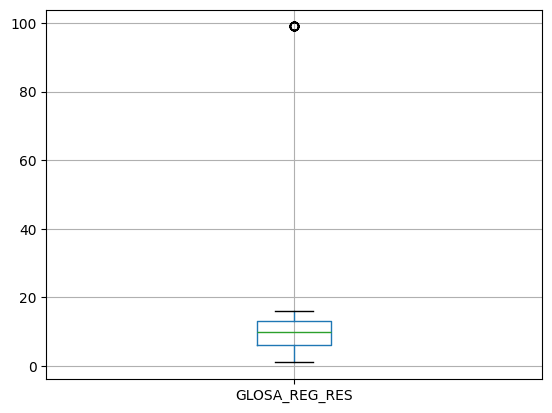

In [28]:
import matplotlib.pyplot as plt

df.boxplot(column=['GLOSA_REG_RES'])
plt.show()

We will replace the "Ignored" (99) values and null data in the GLOSA_REG_RES variable by assigning the mean or mode, as appropriate. This approach will apply to both GLOSA_REG_RES and the related variables, CODIGO_COMUNA_RESIDENCIA and GLOSA_COMUNA_RESIDENCIA.

Since the number of outliers is very low, assigning the mean or mode of their column would not be meaningful for our analysis.

In [29]:
moda_codigo_comuna = df['CODIGO_COMUNA_RESIDENCIA'].mode()[0]
df['CODIGO_COMUNA_RESIDENCIA'].replace(99999, moda_codigo_comuna, inplace=True)  


moda_glosa_reg_res = df['GLOSA_REG_RES'].mode()[0]
df['GLOSA_REG_RES'].replace(99, moda_glosa_reg_res, inplace=True)


moda_comuna = df['GLOSA_COMUNA_RESIDENCIA'].mode()[0]
df['GLOSA_COMUNA_RESIDENCIA'].replace('Ignorada', moda_comuna, inplace=True) 

C:\Users\victo\AppData\Local\Temp\ipykernel_40240\3337907571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CODIGO_COMUNA_RESIDENCIA'].replace(99999, moda_codigo_comuna, inplace=True)
C:\Users\victo\AppData\Local\Temp\ipykernel_40240\3337907571.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

We will convert the data in the GLOSA_SEXO column to integer type to facilitate future work. The coding will be as follows:

Male = 1
Female = 2
Undefined = 3

In [30]:
df['GLOSA_SEXO'] = df['GLOSA_SEXO'].map({
    'Hombre': 1,
    'Mujer': 2,
    'Indeterminado': 3
})

print(df['GLOSA_SEXO'].head())

0    2
1    1
2    1
4    1
5    2
Name: GLOSA_SEXO, dtype: int64


We will delete the data with GLOSA_SEXO=3 (other), as it represents a minor portion compared to the other genders and does not provide relevant information for our project.

In [31]:
import pandas as pd

df = df[df['GLOSA_SEXO'] != 3]

The codes in the CODIGO_COMUNA_RESIDENCIA column are in float64 format (numbers that can have decimals). However, since all end in ".0", it is unnecessary to keep this format. Therefore, we will convert them to int format, as all values are integers without a decimal part. This simplifies data handling and makes it clearer.

In [32]:
df.dtypes

ANO_DEF                      int64
FECHA_DEF                   object
GLOSA_SEXO                   int64
EDAD_TIPO                    int64
EDAD_CANT                    int64
CODIGO_COMUNA_RESIDENCIA     int64
GLOSA_COMUNA_RESIDENCIA     object
GLOSA_REG_RES                int64
GLOSA_CAPITULO_DIAG1        object
GLOSA_GRUPO_DIAG1           object
LUGAR_DEFUNCION              int64
EDAD_AJUSTADA                Int64
DIAG1_encoded                int64
GRUPO_DIAG1_ENCODED          int64
dtype: object

We will convert all values in the EDAD_TIPO column to 1 (age in years), as we will now only consider people's ages in years.

In [33]:
df['EDAD_TIPO'] = 1

print(df['EDAD_TIPO'].head())

0    1
1    1
2    1
4    1
5    1
Name: EDAD_TIPO, dtype: int64


We calculate descriptive statistics for ages in years using the edad_en_anios column in the DataFrame. First, we extract the converted age values in years. Then, we use NumPy functions to calculate three important measures: the mean, median, and standard deviation of these ages. The mean indicates the average age of the deceased, giving us a general idea of the age distribution. The median represents the age that divides the population into two halves. The standard deviation measures age variability; a high value suggests a wide range of ages among the deceased, while a low value indicates that ages are more clustered around the mean. Finally, we print these results to better understand the age distribution in the dataset.

In [34]:
edades = df['EDAD_AJUSTADA']  

media_edad = np.mean(edades)
mediana_edad = np.median(edades)
desviacion_estandar = np.std(edades)

print(f"Media de edad: {media_edad:.2f} años")
print(f"Mediana de edad: {mediana_edad:.2f} años")
print(f"Desviación estándar de la edad: {desviacion_estandar:.2f} años")

Media de edad: 74.80 años
Mediana de edad: nan años
Desviación estándar de la edad: 17.01 años


In [35]:
df = df.dropna(subset=['EDAD_AJUSTADA'])

In [36]:
df['EDAD_AJUSTADA'] = df['EDAD_AJUSTADA'].astype(int)

We will standardize the EDAD_CANT variable to facilitate comparison with other variables and improve the performance of our future algorithms. From now on, ages will be expressed in relation to their mean, which will help us understand how this variable behaves with the rest of the dataset.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['EDAD_CANT'] = scaler.fit_transform(df[['EDAD_CANT']])

We will now apply metrics to balance the important classes we will use for working with the models and our target.

We install the tool that allows us to balance the classes.

In [38]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


We balance the LUGAR_DEFUNCION and GLOSA_SEXO columns, ensuring the same number of data entries for each class, as adding data to different classes separately would prevent having the same amount for both classes.

In [39]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

X = df.drop(columns=['LUGAR_DEFUNCION', 'GLOSA_SEXO']) 


df['LUGAR_SEXO_COMBINADO'] = df['LUGAR_DEFUNCION'].astype(str) + '_' + df['GLOSA_SEXO'].astype(str)
y = df['LUGAR_SEXO_COMBINADO']  

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

y_resampled = y_resampled.str.split('_', expand=True)
y_resampled.columns = ['LUGAR_DEFUNCION', 'GLOSA_SEXO']


df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print(df_resampled['LUGAR_DEFUNCION'].value_counts())
print(df_resampled['GLOSA_SEXO'].value_counts())


LUGAR_DEFUNCION
1    180118
2    180118
Name: count, dtype: int64
GLOSA_SEXO
2    180118
1    180118
Name: count, dtype: int64


We decided to create three pipelines to automate our processes in the future. To run the pipelines, we must execute the commands in the console from the project folder.

Pipeline 1: sexo_int()

Function: Converts values in the GLOSA_SEXO column to numeric data.
Command: kedro run --pipeline 1
Pipeline 2: lugar_defunciones()

Function: Converts values in the LUGAR_DEFUNCION column to numeric data.
Command: kedro run --pipeline 2
Pipeline 3: eliminar_columnas()

Function: Removes columns with the highest number of null data points.
Command: kedro run --pipeline 3

# Conclusions Phase 1, 2, and 3

The Metropolitan Region of Santiago stands out significantly with 125,378 deaths, far surpassing other regions. This could be attributed to the population density in the capital, as it is the country’s most populated region.

Valparaíso and Biobío also show a considerable number of deaths, with 41,297 and 31,562 respectively, which is expected given their relatively high populations. On the other hand, more remote and less populated regions, such as Aysén and Magallanes, report significantly fewer deaths, with figures of 1,671 and 3,218, respectively.

Malignant tumors of digestive organs are the leading cause of death, with 31,260 fatalities. This highlights the importance of cancer, specifically in digestive organs, as a major public health challenge in Chile.

Ischemic heart diseases rank second, with 24,210 deaths. These diseases are typical of countries with Western lifestyle habits, associated with a high-fat diet and risk factors such as hypertension and smoking.

In third place, cerebrovascular diseases have caused 20,720 deaths, indicating that both circulatory issues and strokes are major health concerns in the country.

Hypertensive diseases are also among the top causes, with 19,153 deaths, underscoring the impact of high blood pressure on overall mortality.

Finally, there is a category of provisional assignment for new ailments of uncertain etiology, with 16,559 deaths. This group may include deaths from incompletely understood causes or emerging diseases that require further investigation.

## PHASES 4 AND 5: MODELING AND MODEL EVALUATION

Before moving on to the next phases, we will divide our dataset into two parts. The first will contain all information exclusively from the Metropolitan Region, while the second will include data from other regions, excluding the Metropolitan Region.

This decision has been made due to the significant difference in data volume between the Metropolitan Region and other regions. This separation will allow us to better understand the data and obtain more accurate results in our models.

In [40]:
df_region_13 = df_resampled[df_resampled['GLOSA_REG_RES'] == 13]

df_otras_regiones = df_resampled[df_resampled['GLOSA_REG_RES'] != 13]

### Regression Models

#### MODEL 1: TRAINING AND EVALUATION OF LINEAR REGRESSION

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'

def train_and_evaluate_model(df):

    X = df[features]
    y = df[target]


    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train, y_train)


    y_pred_train = lin_reg_model.predict(X_train)
    y_pred_test = lin_reg_model.predict(X_test)


    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)


    return train_r2, test_r2, train_mse, test_mse, train_mae, test_mae


train_r2_region_13, test_r2_region_13, train_mse_region_13, test_mse_region_13, train_mae_region_13, test_mae_region_13 = train_and_evaluate_model(df_region_13)

train_r2_otras_regiones, test_r2_otras_regiones, train_mse_otras_regiones, test_mse_otras_regiones, train_mae_otras_regiones, test_mae_otras_regiones = train_and_evaluate_model(df_otras_regiones)


print(f'R^2 Set de Entrenamiento - Región Metropolitana: {train_r2_region_13}')
print(f'R^2 Set de Prueba - Región Metropolitana: {test_r2_region_13}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Región Metropolitana: {train_mse_region_13}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - Región Metropolitana: {test_mse_region_13}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Región Metropolitana: {train_mae_region_13}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - Región Metropolitana: {test_mae_region_13}')
print(f'-----------------------------------------------------------------------------------------------------------------------------')


print(f'R^2 Set de Entrenamiento - Otras Regiones: {train_r2_otras_regiones}')
print(f'R^2 Set de Prueba - Otras Regiones: {test_r2_otras_regiones}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Otras Regiones: {train_mse_otras_regiones}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - Otras Regiones: {test_mse_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Otras Regiones: {train_mae_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - Otras Regiones: {test_mae_otras_regiones}')


R^2 Set de Entrenamiento - Región Metropolitana: 0.5529939068816403
R^2 Set de Prueba - Región Metropolitana: 0.55385725570194
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Región Metropolitana: 1661.105121038035
Error Cuadrático Medio (MSE) SET PRUEBA - Región Metropolitana: 1668.040952961714
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Región Metropolitana: 30.972202095596675
Error Absoluto Medio (MAE) SET PRUEBA - Región Metropolitana: 30.905177852209253
-----------------------------------------------------------------------------------------------------------------------------
R^2 Set de Entrenamiento - Otras Regiones: 0.5215313591875406
R^2 Set de Prueba - Otras Regiones: 0.5182288599500278
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Otras Regiones: 1891.8866616596342
Error Cuadrático Medio (MSE) SET PRUEBA - Otras Regiones: 1905.5483788895633
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Otras Regiones: 32.54131731847078
Error Absoluto Medio (MAE) SET PRUEBA - Otras Re

In general, the results obtained with the linear regression model are moderate and stable, indicating that the model generalizes reasonably well, though its predictive capacity is limited. With an R² between 0.52 and 0.55 and considerable errors in terms of MSE and MAE, the model does not seem to capture all the complexity present in the data. This suggests that the linear regression model may not be sufficient for accurate predictions in these datasets, and nonlinear models or those with greater adaptability could provide better results.

#### MODEL 2: TRAINING AND EVALUATION OF SUPPORT VECTOR MACHINE REGRESSION (SVR)

In [42]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'

def train_and_evaluate_svm(df):

    X = df[features]
    y = df[target]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    svr_rbf = SVR(kernel='rbf')
    param_grid = {
        'C': [1, 10],
        'gamma': [0.01, 0.1]
    }


    X_train_subset = X_train_scaled[:500]
    y_train_subset = y_train[:500]
    grid_search = GridSearchCV(svr_rbf, param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_subset, y_train_subset)


    best_svr = grid_search.best_estimator_


    y_pred_train = best_svr.predict(X_train_scaled)
    y_pred_test = best_svr.predict(X_test_scaled)


    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)


    return grid_search.best_params_, r2_train, r2_test, mse_train, mse_test, mae_train, mae_test


best_params_region_13, r2_train_region_13, r2_test_region_13, mse_train_region_13, mse_test_region_13, mae_train_region_13, mae_test_region_13 = train_and_evaluate_svm(df_region_13)


best_params_otras_regiones, r2_train_otras_regiones, r2_test_otras_regiones, mse_train_otras_regiones, mse_test_otras_regiones, mae_train_otras_regiones, mae_test_otras_regiones = train_and_evaluate_svm(df_otras_regiones)


print(f'Parámetros óptimos - Región Metropolitana: {best_params_region_13}')
print(f'R^2 Set de Entrenamiento - Región Metropolitana: {r2_train_region_13}')
print(f'R^2 Set de Prueba - Región Metropolitana: {r2_test_region_13}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Región Metropolitana: {mse_train_region_13}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - Región Metropolitana: {mse_test_region_13}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Región Metropolitana: {mae_train_region_13}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - Región Metropolitana: {mae_test_region_13}')
print(f'-----------------------------------------------------------------------------------------------------------------------------')


print(f'Parámetros óptimos - Otras Regiones: {best_params_otras_regiones}')
print(f'R^2 Set de Entrenamiento - Otras Regiones: {r2_train_otras_regiones}')
print(f'R^2 Set de Prueba - Otras Regiones: {r2_test_otras_regiones}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Otras Regiones: {mse_train_otras_regiones}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - Otras Regiones: {mse_test_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Otras Regiones: {mae_train_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - Otras Regiones: {mae_test_otras_regiones}')

Parámetros óptimos - Región Metropolitana: {'C': 10, 'gamma': 0.1}
R^2 Set de Entrenamiento - Región Metropolitana: 0.6181707063287387
R^2 Set de Prueba - Región Metropolitana: 0.6233723100427901
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Región Metropolitana: 1421.3268120955938
Error Cuadrático Medio (MSE) SET PRUEBA - Región Metropolitana: 1402.8517428659195
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Región Metropolitana: 24.073516698134277
Error Absoluto Medio (MAE) SET PRUEBA - Región Metropolitana: 23.833657665747207
-----------------------------------------------------------------------------------------------------------------------------
Parámetros óptimos - Otras Regiones: {'C': 10, 'gamma': 0.1}
R^2 Set de Entrenamiento - Otras Regiones: 0.5677410865498759
R^2 Set de Prueba - Otras Regiones: 0.5627333084847688
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Otras Regiones: 1709.5291283198947
Error Cuadrático Medio (MSE) SET PRUEBA - Otras Regiones: 1728.39248140808

In summary, the SVR model manages to capture a considerable portion of the variability in the data for both regions (R² of 0.62 in the Metropolitan Region and 0.56 in Other Regions). The errors in terms of MSE and MAE show a moderate margin of error (with MAE of 23.83 and 27.04, respectively), indicating reasonable, though not ideal, accuracy. These results suggest that the SVR model is effective in capturing patterns within the data, but they also imply that there are aspects of the data that the model has not fully captured, as indicated by the R² values and the error margins.

#### MODEL 3: TRAINING AND EVALUATION OF DECISION TREE REGRESSION

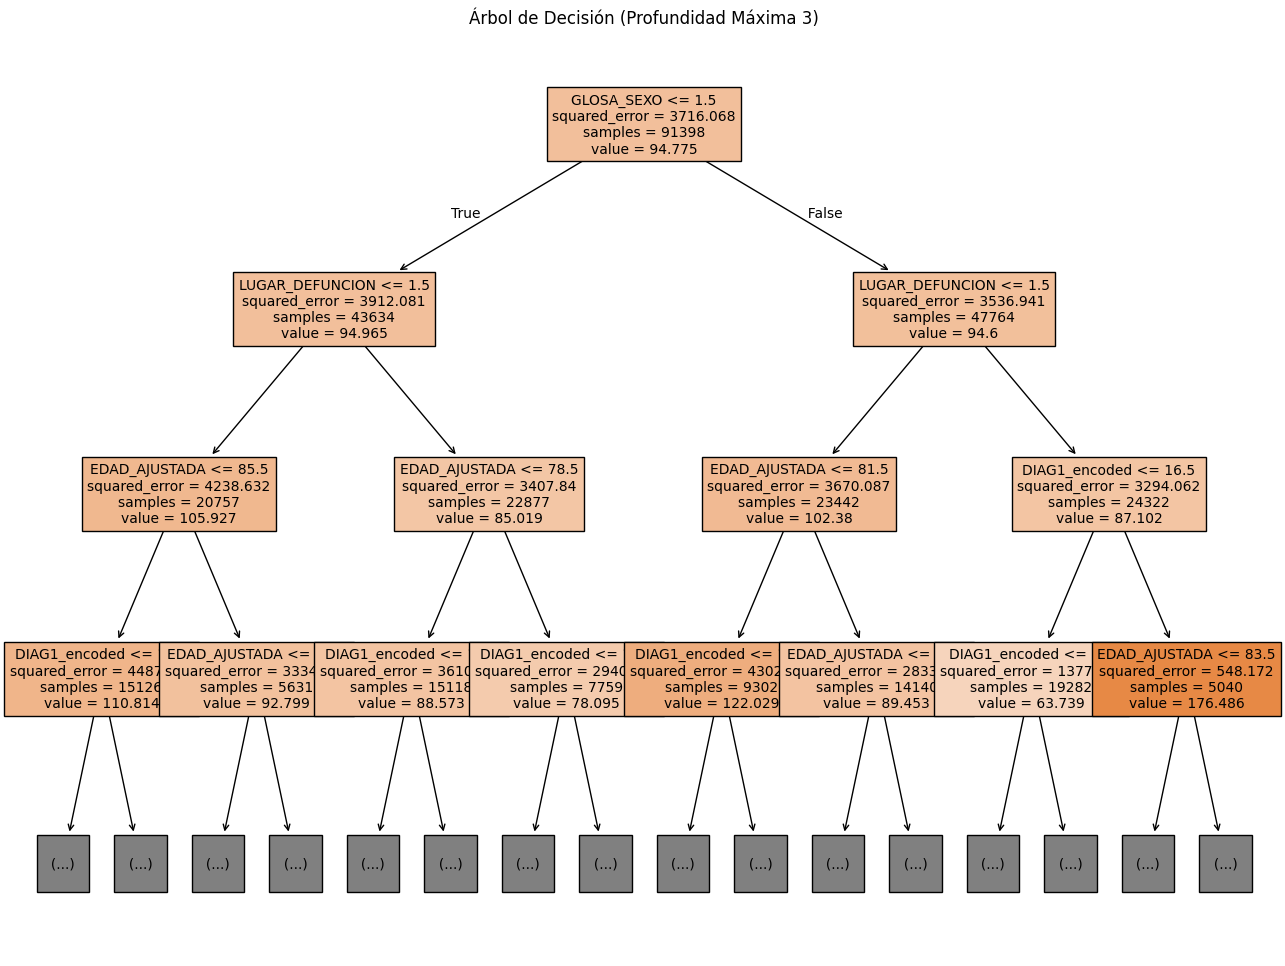

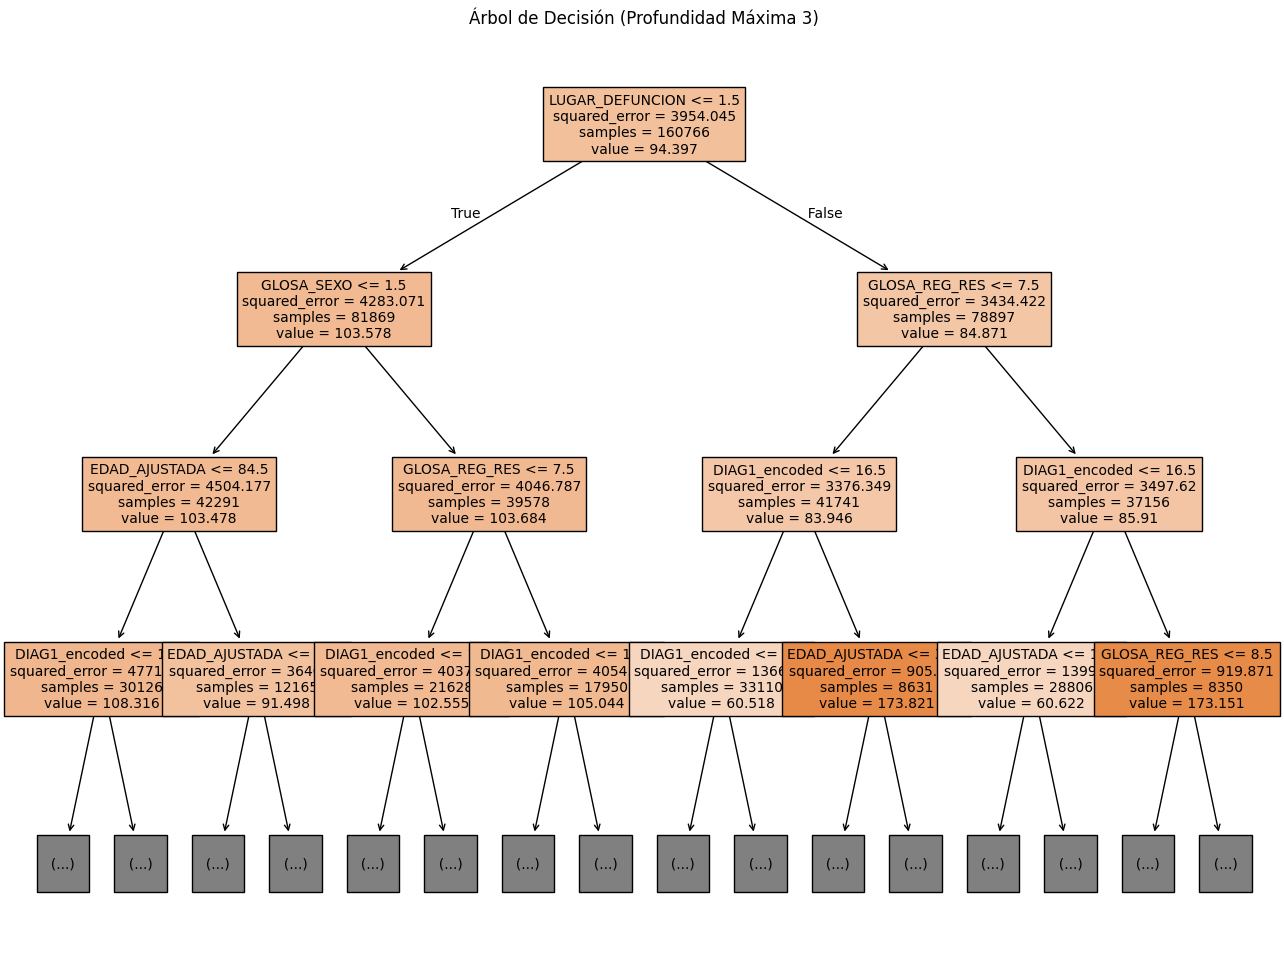

R^2 Set de Entrenamiento - Región Metropolitana: 0.8147290590565647
R^2 Set de Prueba - Región Metropolitana: 0.8062762361069664
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Región Metropolitana: 688.4794492033639
Error Cuadrático Medio (MSE) SET PRUEBA - Región Metropolitana: 724.2954768745095
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Región Metropolitana: 17.126257116663652
Error Absoluto Medio (MAE) SET PRUEBA - Región Metropolitana: 17.447400117854592
-----------------------------------------------------------------------------------------------------------------------------
R^2 Set de Entrenamiento - Otras Regiones: 0.7840961994868533
R^2 Set de Prueba - Otras Regiones: 0.7785727783946057
Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Otras Regiones: 853.6933992139036
Error Cuadrático Medio (MSE) SET PRUEBA - Otras Regiones: 875.8106247883861
Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Otras Regiones: 19.16201592745091
Error Absoluto Medio (MAE) SET PRUEBA - Otras Re

In [43]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'

def train_and_evaluate_decision_tree(df, max_depth=10, min_samples_split=10, min_samples_leaf=5):

    imputer = SimpleImputer(strategy='mean')
    X = df[features]
    y = df[target]
    X_imputed = imputer.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)


    tree_model = DecisionTreeRegressor(
        random_state=42,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features='sqrt'
    )
    tree_model.fit(X_train, y_train)


    y_pred_train = tree_model.predict(X_train)
    y_pred_test = tree_model.predict(X_test)


    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)


    plt.figure(figsize=(16, 12))
    plot_tree(tree_model, filled=True, feature_names=features, fontsize=10, max_depth=3)
    plt.title('Árbol de Decisión (Profundidad Máxima 3)')
    plt.show()


    return train_r2, test_r2, train_mse, test_mse, train_mae, test_mae


train_r2_region_13, test_r2_region_13, train_mse_region_13, test_mse_region_13, train_mae_region_13, test_mae_region_13 = train_and_evaluate_decision_tree(df_region_13)


train_r2_otras_regiones, test_r2_otras_regiones, train_mse_otras_regiones, test_mse_otras_regiones, train_mae_otras_regiones, test_mae_otras_regiones = train_and_evaluate_decision_tree(df_otras_regiones)


print(f'R^2 Set de Entrenamiento - Región Metropolitana: {train_r2_region_13}')
print(f'R^2 Set de Prueba - Región Metropolitana: {test_r2_region_13}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Región Metropolitana: {train_mse_region_13}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - Región Metropolitana: {test_mse_region_13}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Región Metropolitana: {train_mae_region_13}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - Región Metropolitana: {test_mae_region_13}')
print(f'-----------------------------------------------------------------------------------------------------------------------------')


print(f'R^2 Set de Entrenamiento - Otras Regiones: {train_r2_otras_regiones}')
print(f'R^2 Set de Prueba - Otras Regiones: {test_r2_otras_regiones}')
print(f'Error Cuadrático Medio (MSE) SET ENTRENAMIENTO - Otras Regiones: {train_mse_otras_regiones}')
print(f'Error Cuadrático Medio (MSE) SET PRUEBA - Otras Regiones: {test_mse_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET ENTRENAMIENTO - Otras Regiones: {train_mae_otras_regiones}')
print(f'Error Absoluto Medio (MAE) SET PRUEBA - Otras Regiones: {test_mae_otras_regiones}')

The Decision Tree Regression model shows high performance in terms of predictive capacity and accuracy in both regions. With an R² above 77% on test data, the model demonstrates a good ability to capture variability in the data and make reasonably accurate predictions. The relatively low MSE and MAE values indicate that the model successfully minimizes errors, keeping its predictions within a range close to the actual values.

### Classification Models

#### MODEL 1: TRAINING AND EVALUATION OF GRADIENT BOOSTING CLASSIFICATION

Evaluando el modelo con validación cruzada y curva ROC para la Región Metropolitana:


C:\Users\victo\AppData\Local\Temp\ipykernel_40240\2288371202.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning


Cross-Validation Accuracy: 0.3313419117647059 ± 0.1217619871656443
Cross-Validation F1 Score (Weighted): 0.2924684898195435 ± 0.09160752570767493
Cross-Validation Precision (Weighted): 0.3405749615137234 ± 0.06240889744559937
Cross-Validation Recall (Weighted): 0.3313419117647059 ± 0.1217619871656443

Accuracy (Test): 0.40199081163859113
F1 Score (Promedio Ponderado - Test): 0.3426720053851852
Precisión (Promedio Ponderado - Test): 0.3296331424567256
Recall (Promedio Ponderado - Test): 0.40199081163859113

Reporte de Clasificación (Test):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           4       0.57      1.00      0.73         4
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
          10       0.99      0.90      0.94        82
          12       0.00      0.00      0.00         3
          13       0

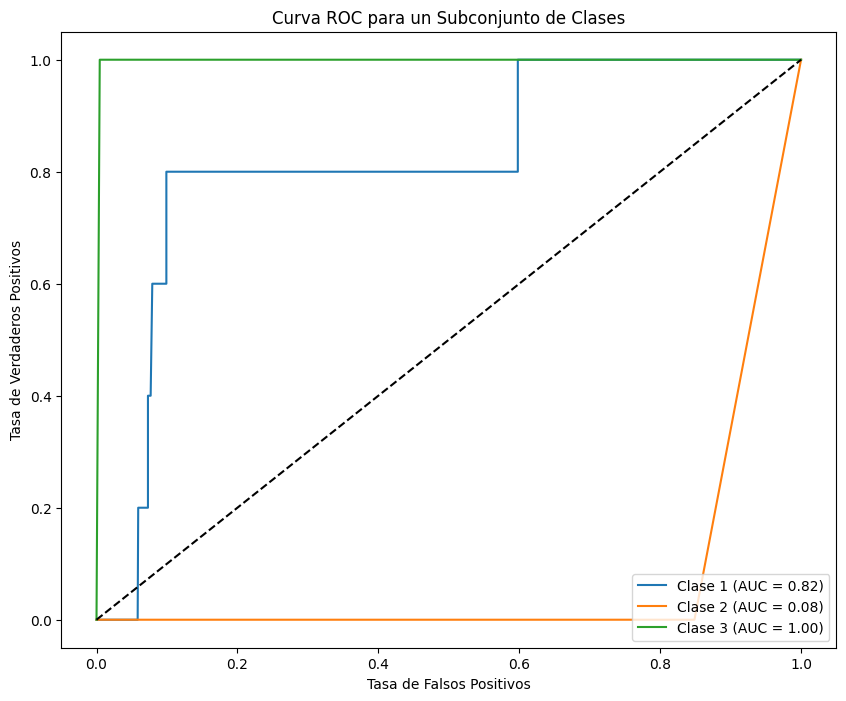

-----------------------------------------------------------------------------------------------------------------------------
Evaluando el modelo con validación cruzada y curva ROC para Otras Regiones:


C:\Users\victo\AppData\Local\Temp\ipykernel_40240\2288371202.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning


Cross-Validation Accuracy: 0.40860061651083696 ± 0.031333898725887724
Cross-Validation F1 Score (Weighted): 0.35866502880533613 ± 0.02043392678649798
Cross-Validation Precision (Weighted): 0.37242971116882934 ± 0.016927771516883138
Cross-Validation Recall (Weighted): 0.40860061651083696 ± 0.031333898725887724

Accuracy (Test): 0.42925555071832827
F1 Score (Promedio Ponderado - Test): 0.36641551124049654
Precisión (Promedio Ponderado - Test): 0.3781536336640238
Recall (Promedio Ponderado - Test): 0.42925555071832827

Reporte de Clasificación (Test):
               precision    recall  f1-score   support

          -1       0.39      0.61      0.48        18
           1       0.00      0.00      0.00         2
           4       1.00      0.12      0.22         8
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.16      1.00      0.27         3
          

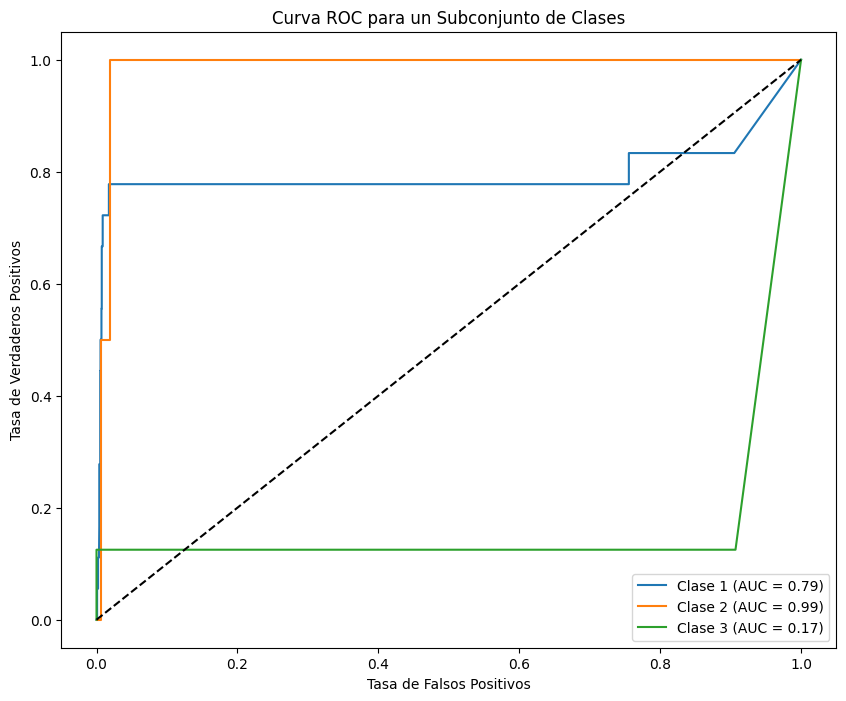

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'

def train_and_evaluate_gradient_boosting_with_cv_and_roc(df, sample_frac=0.05, cv=3):

    for feature in features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')


    df_sampled = df.sample(frac=sample_frac, random_state=42)
    X = df_sampled[features]
    y = df_sampled[target] - 1 


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


    gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)


    skf = StratifiedKFold(n_splits=cv)
    f1_scores = cross_val_score(gb_model, X_scaled, y, cv=skf, scoring='f1_weighted')
    precision_scores = cross_val_score(gb_model, X_scaled, y, cv=skf, scoring='precision_weighted')
    recall_scores = cross_val_score(gb_model, X_scaled, y, cv=skf, scoring='recall_weighted')
    accuracy_scores = cross_val_score(gb_model, X_scaled, y, cv=skf, scoring='accuracy')


    gb_model.fit(X_train, y_train)
    y_test_pred = gb_model.predict(X_test)


    accuracy = accuracy_score(y_test, y_test_pred)
    f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_test_pred, average='weighted')
    report = classification_report(y_test, y_test_pred)


    print(f"\nCross-Validation Accuracy: {accuracy_scores.mean()} ± {accuracy_scores.std()}")
    print(f"Cross-Validation F1 Score (Weighted): {f1_scores.mean()} ± {f1_scores.std()}")
    print(f"Cross-Validation Precision (Weighted): {precision_scores.mean()} ± {precision_scores.std()}")
    print(f"Cross-Validation Recall (Weighted): {recall_scores.mean()} ± {recall_scores.std()}")

    print(f"\nAccuracy (Test): {accuracy}")
    print(f"F1 Score (Promedio Ponderado - Test): {f1_weighted}")
    print(f"Precisión (Promedio Ponderado - Test): {precision_weighted}")
    print(f"Recall (Promedio Ponderado - Test): {recall_weighted}")
    print("\nReporte de Clasificación (Test):\n", report)


    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    y_test_pred_proba = gb_model.predict_proba(X_test)

    plt.figure(figsize=(10, 8))
    for i in range(min(3, y_test_binarized.shape[1])):  
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Clase {i + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC para un Subconjunto de Clases')
    plt.legend(loc='lower right')
    plt.show()


    return accuracy, f1_weighted, precision_weighted, recall_weighted


print("Evaluando el modelo con validación cruzada y curva ROC para la Región Metropolitana:")
accuracy_region_13, f1_region_13, precision_region_13, recall_region_13 = train_and_evaluate_gradient_boosting_with_cv_and_roc(df_region_13)
print("-----------------------------------------------------------------------------------------------------------------------------")

print("Evaluando el modelo con validación cruzada y curva ROC para Otras Regiones:")
accuracy_otras_regiones, f1_otras_regiones, precision_otras_regiones, recall_otras_regiones = train_and_evaluate_gradient_boosting_with_cv_and_roc(df_otras_regiones)


Overall, the Gradient Boosting Classification model shows low performance in both regions, in cross-validation as well as in the test set. The accuracy and weighted F1 Score values on the test set, 40.2% and 34.3%, respectively, for the Metropolitan Region, and 42.9% and 36.6% for Other Regions, indicate that the model faces significant challenges in correctly classifying instances across all classes.

The low variability in cross-validation for Other Regions reflects consistency in the model's performance, although accuracy remains limited. However, in the Metropolitan Region, the higher variability indicates greater instability in the model.

#### MODEL 2: TRAINING AND EVALUATION OF LOGISTIC REGRESSION

Evaluando el modelo con validación cruzada y curva ROC para la Región Metropolitana:


C:\Users\victo\AppData\Local\Temp\ipykernel_40240\4192397340.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning


Cross-Validation Accuracy: 0.34655734170822017 ± 0.0025935568101577372
Cross-Validation F1 Score (Weighted): 0.23365006911929806 ± 0.0031759897534603828
Cross-Validation Precision (Weighted): 0.20110246707963422 ± 0.015742817397423402
Cross-Validation Recall (Weighted): 0.34655734170822017 ± 0.0025935568101577372

Accuracy (Test): 0.3460949464012251
F1 Score (Promedio Ponderado - Test): 0.23424052806726242
Precisión (Promedio Ponderado - Test): 0.19322549704141365
Recall (Promedio Ponderado - Test): 0.3460949464012251

Reporte de Clasificación (Test):
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.61      1.00      0.75       115
       

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

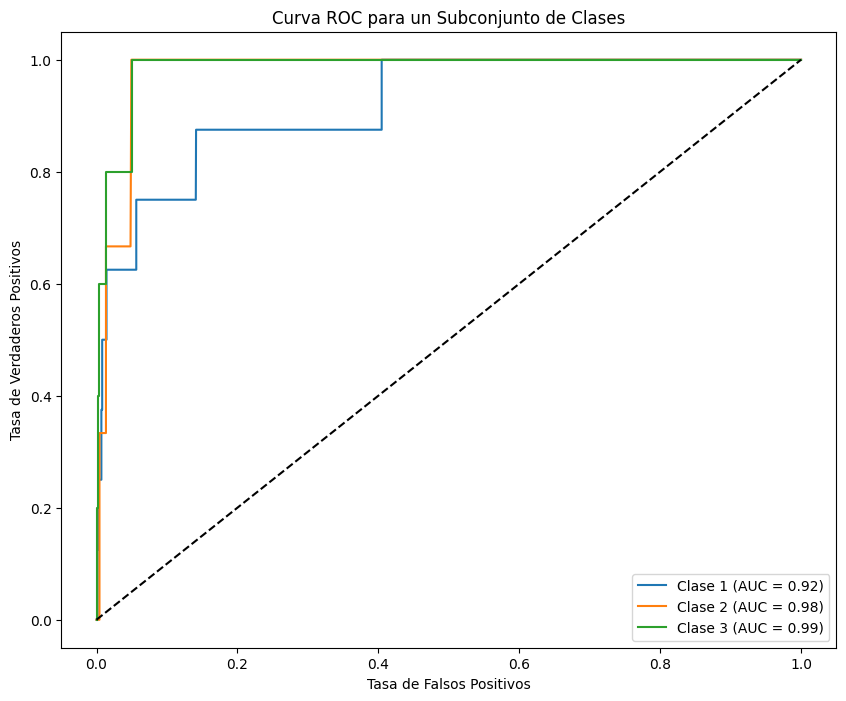

C:\Users\victo\AppData\Local\Temp\ipykernel_40240\4192397340.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


-----------------------------------------------------------------------------------------------------------------------------
Evaluando el modelo con validación cruzada y curva ROC para Otras Regiones:


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl


Cross-Validation Accuracy: 0.3553792616586824 ± 0.003354260578669801
Cross-Validation F1 Score (Weighted): 0.2540045077383528 ± 0.0027652226793166614
Cross-Validation Precision (Weighted): 0.21185027801813316 ± 0.0025602116869662315
Cross-Validation Recall (Weighted): 0.3553792616586824 ± 0.003354260578669801

Accuracy (Test): 0.36852416195037
F1 Score (Promedio Ponderado - Test): 0.2665567886620912
Precisión (Promedio Ponderado - Test): 0.21985809420955935
Recall (Promedio Ponderado - Test): 0.36852416195037

Reporte de Clasificación (Test):
               precision    recall  f1-score   support

          -1       0.46      0.45      0.46        42
           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        16
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         2
           9    

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

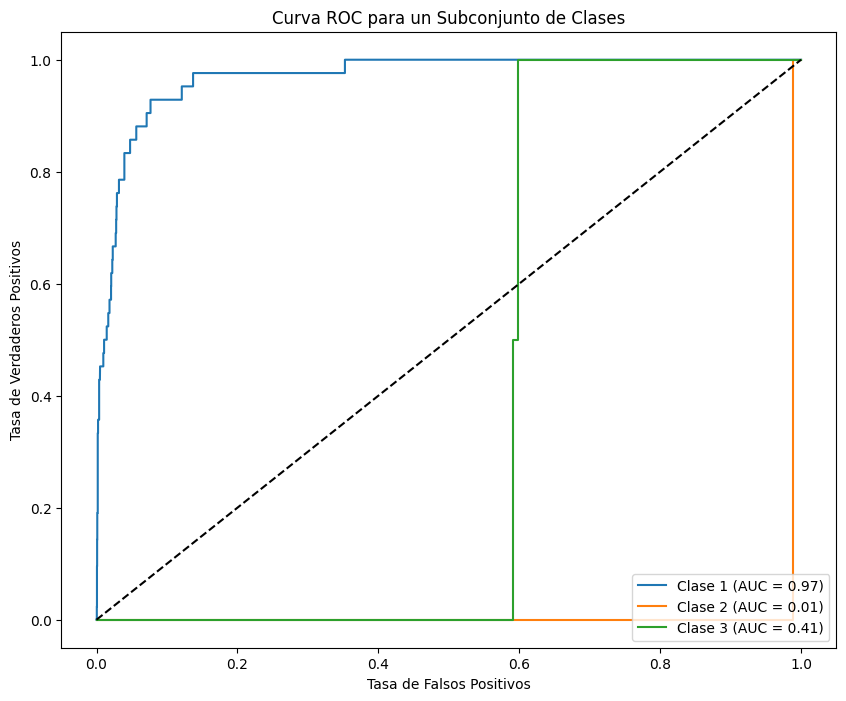

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'

def train_and_evaluate_logistic_regression_with_cv_and_roc(df, sample_frac=0.1, cv=3):

    for feature in features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')


    df_sampled = df.sample(frac=sample_frac, random_state=42)
    X = df_sampled[features]
    y = df_sampled[target] - 1 

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


    log_reg_model = LogisticRegression(max_iter=1000, random_state=42)


    skf = StratifiedKFold(n_splits=cv)
    f1_scores = cross_val_score(log_reg_model, X_scaled, y, cv=skf, scoring='f1_weighted')
    precision_scores = cross_val_score(log_reg_model, X_scaled, y, cv=skf, scoring='precision_weighted')
    recall_scores = cross_val_score(log_reg_model, X_scaled, y, cv=skf, scoring='recall_weighted')
    accuracy_scores = cross_val_score(log_reg_model, X_scaled, y, cv=skf, scoring='accuracy')


    log_reg_model.fit(X_train, y_train)
    y_test_pred = log_reg_model.predict(X_test)


    accuracy = accuracy_score(y_test, y_test_pred)
    f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_test_pred, average='weighted')
    report = classification_report(y_test, y_test_pred)


    print(f"\nCross-Validation Accuracy: {accuracy_scores.mean()} ± {accuracy_scores.std()}")
    print(f"Cross-Validation F1 Score (Weighted): {f1_scores.mean()} ± {f1_scores.std()}")
    print(f"Cross-Validation Precision (Weighted): {precision_scores.mean()} ± {precision_scores.std()}")
    print(f"Cross-Validation Recall (Weighted): {recall_scores.mean()} ± {recall_scores.std()}")

    print(f"\nAccuracy (Test): {accuracy}")
    print(f"F1 Score (Promedio Ponderado - Test): {f1_weighted}")
    print(f"Precisión (Promedio Ponderado - Test): {precision_weighted}")
    print(f"Recall (Promedio Ponderado - Test): {recall_weighted}")
    print("\nReporte de Clasificación (Test):\n", report)


    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    y_test_pred_proba = log_reg_model.predict_proba(X_test)

    plt.figure(figsize=(10, 8))
    for i in range(min(3, y_test_binarized.shape[1])):  
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Clase {i + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC para un Subconjunto de Clases')
    plt.legend(loc='lower right')
    plt.show()

    
    return accuracy, f1_weighted, precision_weighted, recall_weighted


print("Evaluando el modelo con validación cruzada y curva ROC para la Región Metropolitana:")
accuracy_region_13, f1_region_13, precision_region_13, recall_region_13 = train_and_evaluate_logistic_regression_with_cv_and_roc(df_region_13)
print("-----------------------------------------------------------------------------------------------------------------------------")


print("Evaluando el modelo con validación cruzada y curva ROC para Otras Regiones:")
accuracy_otras_regiones, f1_otras_regiones, precision_otras_regiones, recall_otras_regiones = train_and_evaluate_logistic_regression_with_cv_and_roc(df_otras_regiones)


The Logistic Regression model shows low yet stable performance in both regions, in cross-validation results as well as in the test set. With accuracy and weighted F1 Score values ranging between 20% and 36%, the model struggles to correctly classify instances. Recall values in both regions indicate that the model identifies only a portion of the true positives, limiting its ability to capture all classes accurately.

The low variability in cross-validation metrics suggests that the model has stable performance; however, the limited accuracy reflects insufficient capacity to accurately classify the different classes. This is confirmed in the test set, where the metrics show similar performance.

#### MODEL 3: TRAINING AND EVALUATION OF RANDOM FOREST CLASSIFIER

Evaluando el modelo con validación cruzada y curva ROC para la Región Metropolitana:


C:\Users\victo\AppData\Local\Temp\ipykernel_40240\3619198415.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning


Cross-Validation Accuracy: 0.4141082130646883 ± 0.00800492661909257
Cross-Validation F1 Score (Weighted): 0.37805324679107416 ± 0.006194754433245338
Cross-Validation Precision (Weighted): 0.3694548152426329 ± 0.002964163195811754
Cross-Validation Recall (Weighted): 0.4141082130646883 ± 0.00800492661909257

Accuracy (Test): 0.4107963246554365
F1 Score (Promedio Ponderado - Test): 0.37648723874405354
Precisión (Promedio Ponderado - Test): 0.37116370689833544
Recall (Promedio Ponderado - Test): 0.4107963246554365

Reporte de Clasificación (Test):
               precision    recall  f1-score   support

          -1       0.60      0.38      0.46         8
           1       0.00      0.00      0.00         3
           4       0.29      0.40      0.33         5
           7       0.33      0.25      0.29         4
           8       0.67      1.00      0.80         2
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00       115
          12   

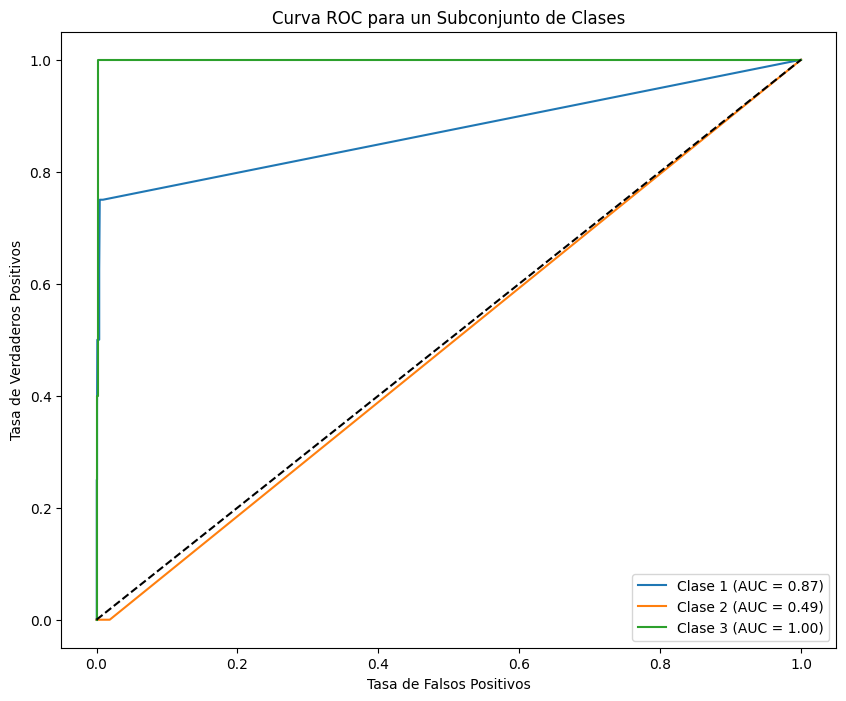

-----------------------------------------------------------------------------------------------------------------------------
Evaluando el modelo con validación cruzada y curva ROC para Otras Regiones:


C:\Users\victo\AppData\Local\Temp\ipykernel_40240\3619198415.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning


Cross-Validation Accuracy: 0.392868304432191 ± 0.004559348108351648
Cross-Validation F1 Score (Weighted): 0.3780269772417462 ± 0.003949456793714359
Cross-Validation Precision (Weighted): 0.3685266434034611 ± 0.0038463824266157637
Cross-Validation Recall (Weighted): 0.392868304432191 ± 0.004559348108351648

Accuracy (Test): 0.4085764040052242
F1 Score (Promedio Ponderado - Test): 0.3948037673622804
Precisión (Promedio Ponderado - Test): 0.3892053699398198
Recall (Promedio Ponderado - Test): 0.4085764040052242

Reporte de Clasificación (Test):
               precision    recall  f1-score   support

          -1       0.55      0.64      0.59        42
           0       0.00      0.00      0.00         1
           1       0.25      0.50      0.33         2
           4       0.61      0.69      0.65        16
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         6
           8       1.00      0.50      0.67         2
           9     

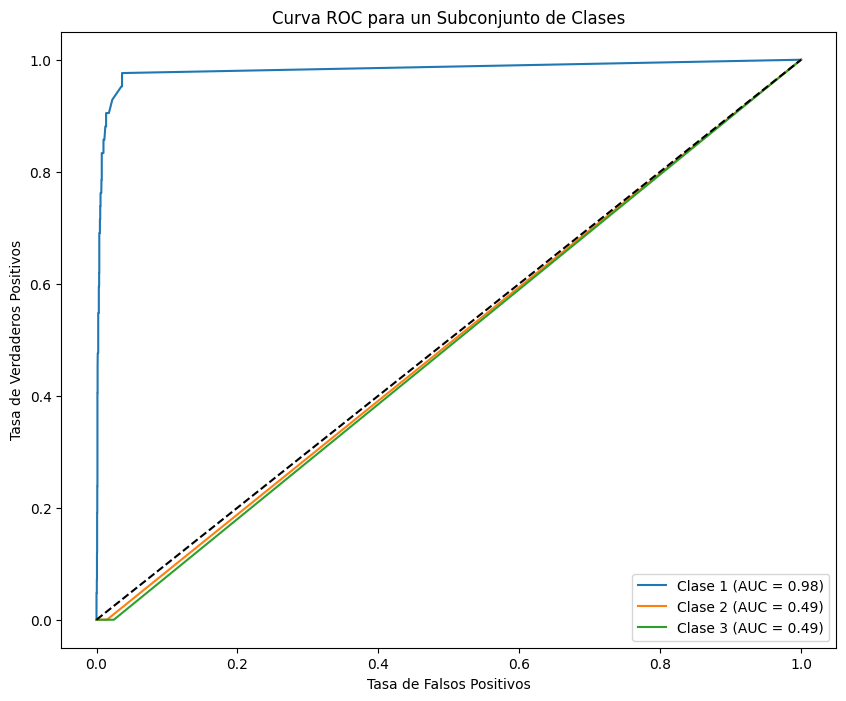

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import numpy as np

def train_evaluate_random_forest_with_cv_and_roc(df, sample_frac=0.1, cv=3):

    features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
    target = 'GRUPO_DIAG1_ENCODED'


    for feature in features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')


    df_sampled = df.sample(frac=sample_frac, random_state=42)
    X = df_sampled[features]
    y = df_sampled[target] - 1  


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


    rf_model = RandomForestClassifier(random_state=42)


    skf = StratifiedKFold(n_splits=cv)
    f1_scores = cross_val_score(rf_model, X_scaled, y, cv=skf, scoring='f1_weighted')
    precision_scores = cross_val_score(rf_model, X_scaled, y, cv=skf, scoring='precision_weighted')
    recall_scores = cross_val_score(rf_model, X_scaled, y, cv=skf, scoring='recall_weighted')
    accuracy_scores = cross_val_score(rf_model, X_scaled, y, cv=skf, scoring='accuracy')


    rf_model.fit(X_train, y_train)
    y_test_pred = rf_model.predict(X_test)


    accuracy = accuracy_score(y_test, y_test_pred)
    f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
    precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
    recall_weighted = recall_score(y_test, y_test_pred, average='weighted')
    report = classification_report(y_test, y_test_pred)


    print(f"\nCross-Validation Accuracy: {accuracy_scores.mean()} ± {accuracy_scores.std()}")
    print(f"Cross-Validation F1 Score (Weighted): {f1_scores.mean()} ± {f1_scores.std()}")
    print(f"Cross-Validation Precision (Weighted): {precision_scores.mean()} ± {precision_scores.std()}")
    print(f"Cross-Validation Recall (Weighted): {recall_scores.mean()} ± {recall_scores.std()}")

    print(f"\nAccuracy (Test): {accuracy}")
    print(f"F1 Score (Promedio Ponderado - Test): {f1_weighted}")
    print(f"Precisión (Promedio Ponderado - Test): {precision_weighted}")
    print(f"Recall (Promedio Ponderado - Test): {recall_weighted}")
    print("\nReporte de Clasificación (Test):\n", report)


    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    y_test_pred_proba = rf_model.predict_proba(X_test)

    plt.figure(figsize=(10, 8))
    for i in range(min(3, y_test_binarized.shape[1])):  
        fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Clase {i + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC para un Subconjunto de Clases')
    plt.legend(loc='lower right')
    plt.show()


    return accuracy, f1_weighted, precision_weighted, recall_weighted


print("Evaluando el modelo con validación cruzada y curva ROC para la Región Metropolitana:")
accuracy_region_13, f1_region_13, precision_region_13, recall_region_13 = train_evaluate_random_forest_with_cv_and_roc(df_region_13)
print("-----------------------------------------------------------------------------------------------------------------------------")


print("Evaluando el modelo con validación cruzada y curva ROC para Otras Regiones:")
accuracy_otras_regiones, f1_otras_regiones, precision_otras_regiones, recall_otras_regiones = train_evaluate_random_forest_with_cv_and_roc(df_otras_regiones)


Overall, the Random Forest Classifier model demonstrates consistent and moderate performance in both cross-validation results and the test set. With accuracy and weighted F1 Score values between 37% and 41%, the model can correctly classify a limited proportion of instances in both regions.

The low variability in cross-validation metrics reflects that the model is stable in its performance; however, the moderate precision and recall values indicate that the model has limited classification capacity with this data. This is confirmed in the test set, where the performance metrics are similar to those in cross-validation.

## PHASE 6: DEPLOYMENT

In this phase, we will make predictions by inputting fictitious data using the model that delivered the best results.

Among the classification models, the Random Forest Classifier and Gradient Boosting showed similar and moderate performance, with an accuracy of around 40%.

In this case, we will use the Gradient Boosting model to make the predictions.

ADJUSTED_AGE: Person's age.

PLACE_OF_DEATH:

1 = Private residence  \
2 = Hospital or Clinic 


GENDER_LABEL:

1 = Male \
2 = Female 


RESIDENCE_REGION_LABEL: If from the Metropolitan Region, enter 13; if from another region, enter a value between 1 and 16 but excluding the number 13. Additionally, select the corresponding model.

DIAG1_encoded: The primary diagnosis:

Conditions originating in the perinatal period = 0 \
Certain infectious and parasitic diseases = 1 \
Codes for special purposes = 2 \
Pregnancy, childbirth, and the puerperium = 3 \
Skin and subcutaneous tissue diseases = 4 \
Diseases of the blood and hematopoietic organs, and certain disorders affecting the immune mechanism = 5 \
Eye diseases and related structures = 6 \
Diseases of the ear and mastoid process = 7 \
Circulatory system diseases = 8 \
Digestive system diseases = 9 \
Genitourinary system diseases = 10 \
Central nervous system diseases = 11 \
Musculoskeletal system and connective tissue diseases = 12 \
Respiratory system diseases = 13 \
Endocrine, nutritional, and metabolic diseases = 14 \
Congenital malformations, deformations, and chromosomal abnormalities = 15 \
Symptoms, signs, and abnormal clinical and laboratory findings, not elsewhere classified = 16 \
Mental and behavioral disorders = 17 \
Injuries, poisonings, and certain other consequences of external causes = 18 \
Tumors [Neoplasms] = 19

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_gradient_boosting(df, sample_frac=0.05):

    for feature in features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')
    

    df_sampled = df.sample(frac=sample_frac, random_state=42)
    X = df_sampled[features]
    y = df_sampled[target] - 1  


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


    gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
    gb_model.fit(X_train, y_train)


    return gb_model, scaler


def predict_with_input(model, scaler, input_data):

    input_df = pd.DataFrame([input_data], columns=features)
    

    for feature in features:
        input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    input_scaled = scaler.transform(input_df)
    

    prediction = model.predict(input_scaled)
    return prediction[0] + 1 


gb_model_region_13, scaler_region_13 = train_gradient_boosting(df_region_13)


gb_model_otras_regiones, scaler_otras_regiones = train_gradient_boosting(df_otras_regiones)


new_input = {
    'EDAD_AJUSTADA': 70,
    'LUGAR_DEFUNCION': 1,
    'GLOSA_SEXO': 1,
    'GLOSA_REG_RES': 13, # NO MOVER YA QUE ES REGION METROPOLITANA
    'DIAG1_encoded': 10
}


prediction_region_13 = predict_with_input(gb_model_region_13, scaler_region_13, new_input)
print(f"PREDICCIONN DE DEFUNCION SI ES QUE MURIO EN LA REGION METROPOLITANA : {prediction_region_13}")

C:\Users\victo\AppData\Local\Temp\ipykernel_40240\923848065.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
C:\Users\victo\AppData\Local\Temp\ipykernel_40240\923848065.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')


PREDICCIONN DE DEFUNCION SI ES QUE MURIO EN LA REGION METROPOLITANA : 73


Now we will proceed to find the result for the possible cause of death.

We need to replace the variable number with the result of the previous prediction.

In [51]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

clases_unicas = df['GLOSA_GRUPO_DIAG1'].unique()

clases_df = pd.DataFrame(clases_unicas, columns=['Clases'])

numero = 73  # Cambia este número al índice que quieras ver
print(f'Clase número {numero}: {clases_df.iloc[numero]}')

Clase número 73: Clases    Melanoma y otros tumores malignos de la piel
Name: 73, dtype: object


As observed, inputting the following parameters:

- `'ADJUSTED_AGE'`: 70
- `'PLACE_OF_DEATH'`: 1 (Private residence)
- `'GENDER_LABEL'`: 1 (Male)
- `'RESIDENCE_REGION_LABEL'`: 13 (Metropolitan region)
- `'DIAG1_encoded'`: 10

resulted in the possible cause of death being identified as: *Melanoma and other malignant skin tumors.*

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier


features = ['EDAD_AJUSTADA', 'LUGAR_DEFUNCION', 'GLOSA_SEXO', 'GLOSA_REG_RES', 'DIAG1_encoded']
target = 'GRUPO_DIAG1_ENCODED'


def train_gradient_boosting(df, sample_frac=0.05):

    for feature in features:
        df[feature] = pd.to_numeric(df[feature], errors='coerce')
    

    df_sampled = df.sample(frac=sample_frac, random_state=42)
    X = df_sampled[features]
    y = df_sampled[target] - 1  # Ajustar etiquetas si es necesario


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


    gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
    gb_model.fit(X_train, y_train)


    return gb_model, scaler


def predict_with_input(model, scaler, input_data):

    input_df = pd.DataFrame([input_data], columns=features)
    
    for feature in features:
        input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    input_scaled = scaler.transform(input_df)
    
    prediction = model.predict(input_scaled)
    return prediction[0] + 1 

gb_model_region_13, scaler_region_13 = train_gradient_boosting(df_region_13)

gb_model_otras_regiones, scaler_otras_regiones = train_gradient_boosting(df_otras_regiones)

new_input = {
    'EDAD_AJUSTADA': 4,
    'LUGAR_DEFUNCION': 2,
    'GLOSA_SEXO': 2,
    'GLOSA_REG_RES': 3,
    'DIAG1_encoded': 4
}

prediction_otras_regiones = predict_with_input(gb_model_otras_regiones, scaler_otras_regiones, new_input)
print(f"PREDICCIONN DE DEFUNCION SI ES QUE MURIO EN OTRA REGION DIFERENTE A LA REGION METROPOLITANA: {prediction_otras_regiones}")


C:\Users\victo\AppData\Local\Temp\ipykernel_40240\4012649680.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')
C:\Users\victo\AppData\Local\Temp\ipykernel_40240\4012649680.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_numeric(df[feature], errors='coerce')


PREDICCIONN DE DEFUNCION SI ES QUE MURIO EN OTRA REGION DIFERENTE A LA REGION METROPOLITANA: 106


We will follow the same procedure to look up the prediction result.

In [52]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

clases_unicas = df['GLOSA_GRUPO_DIAG1'].unique()

clases_df = pd.DataFrame(clases_unicas, columns=['Clases'])

numero = 106  # Cambia este número al índice que quieras ver
print(f'Clase número {numero}: {clases_df.iloc[numero]}')

Clase número 106: Clases    Enteritis y colitis no infecciosas
Name: 106, dtype: object


As observed, inputting the following parameters:

- `'ADJUSTED_AGE'`: 4
- `'PLACE_OF_DEATH'`: 2 (Hospital or Clinic)
- `'GENDER_LABEL'`: 2 (Female)
- `'RESIDENCE_REGION_LABEL'`: 3
- `'DIAG1_encoded'`: 4

resulted in the possible cause of death being identified as: *Non-infectious enteritis and colitis.*

## CONCLUSIONS

Initially, a test was conducted without applying generalization or class balancing techniques, resulting in considerably low outcomes. The models struggled to capture data patterns effectively, which impacted prediction accuracy and generalization capacity.

Subsequently, when applying class balancing techniques, such as oversampling, a significant improvement in model outcomes was observed. This approach allowed the models to better capture minority classes and yielded improved classification metrics, resulting in a stronger balance among accuracy, F1 Score, and Recall.

Additionally, by dividing the dataset into two parts—one focused on the Metropolitan Region and the other on regions excluding the Metropolitan Region—significantly better results were obtained compared to training and evaluating the model on all regions combined without any filtering. This segmentation allowed the models to specialize more effectively in regional patterns, leading to more accurate predictions and better generalization across both datasets.

On the other hand, applying cross-validation to the classification models did not yield significant improvements, as variations in performance ranged from only 1% to 3%. In some cases, cross-validation even resulted in worse performance than simpler evaluations. Similarly, applying StandardScaler showed no significant variations in model outcomes.

In summary, the combination of class balancing and regional segmentation of the dataset contributed to a notable improvement in model performance, enabling more precise tuning and a better capacity to generalize the results.